In [1]:
function finite_central_difference_scheme(p,q,r,f,a,b,α,β,h)
    N = convert(Int64, floor(((b-a)/h)-1))
    t = linspace(a,b,N+2)
    Ah = zeros(N, N)
    #Populate Ah:
    for i=1:N
        Ah[i,i] = p((t[i+1]+t[i])/2) + p((t[i+2]+t[i+1])/2)+h^2*r(t[i+1]);
        if i != 1
            Ah[i,i-1] = -p((t[i+1]+t[i])/2) - h/2 * q(t[i+1]);
        end
        if i != N
            Ah[i,i+1] = -p((t[i+2]+t[i+1])/2) + h/2 * q(t[i+1]);
        end
    end
    
    bh = zeros(N)
    bh[1] = h^2*f(t[2]) + p((t[2]+t[1])/2)*α + h/2*q(t[2])*α
    bh[N] = p((t[N+1]+t[N+2])/2)*β - h/2*q(t[N+1])*β
    for i = 2:N-1
        bh[i] = h^2*f(t[i+1])
    end
    uh = Ah \ b
    return t, uh
end

finite_central_difference_scheme (generic function with 1 method)

In [2]:
function finite_central_difference_2_electric_boogaloo(p,q,r,f,a,b,α,β,h)
    N = convert(Int64, floor(((b-a)/h)-1))
    t = linspace(a+h,b-h,N)
    Ah = zeros(N, N)
    bh = zeros(N)
    #Populate special cases:
    Ah[1,1] = p((a+t[1])/2) + p((t[1]+t[2])/2) + h^2*r(t[1])
    Ah[1,2] = -p((t[1]+t[2])/2) + h/2*q(t[1])
    Ah[N,N-1] = -p((t[N-1] + t[N])/2) - h/2*q(t[N])
    Ah[N,N] = p((t[N-1]+t[N])/2) + p((t[N]+b)/2) + h^2*r(t[N])
    
    bh[1] = h^2*f(t[1]) + p((a + t[1])/2)*α + h/2*q(t[1])*α
    bh[N] = h^2*f(t[N]) + p((t[N]+b)/2)*β - h/2*q(t[N])*β
    #Populate rest of matrix and vector:
    for n=2:N-1
        Ah[n,n] = p((t[n-1]+t[n])/2) + p((t[n]+t[n+1])/2) + h^2*r(t[n])
        Ah[n, n-1] = -p((t[n-1]+t[n])/2) - h/2*q(t[n])
        Ah[n, n+1] = -p((t[n]+t[n+1])/2) + h/2*q(t[n])
        bh[n] = h^2 * f(t[n])
    end
    #Solve linear system
    y = Ah \ bh
    return t,y
end

finite_central_difference_2_electric_boogaloo (generic function with 1 method)

In [3]:
ϵ = 1;
p(t) = ϵ;
q(t) = 1;
r(t) = 0;
f(t) = 0;
a = 0;
b = 1;
α = 1;
β = 0;
h = 2.0^-2
ts1a,ys1a = finite_central_difference_2_electric_boogaloo(p,q,r,f,a,b,α,β,h)
h = 2.0^-3
ts2a,ys2a = finite_central_difference_2_electric_boogaloo(p,q,r,f,a,b,α,β,h)
h = 2.0^-4
ts3a,ys3a = finite_central_difference_2_electric_boogaloo(p,q,r,f,a,b,α,β,h)

(0.0625:0.0625:0.9375, [0.962472, 0.922524, 0.879998, 0.834728, 0.786538, 0.735239, 0.68063, 0.622498, 0.560615, 0.49474, 0.424615, 0.349966, 0.270501, 0.185909, 0.0958592])

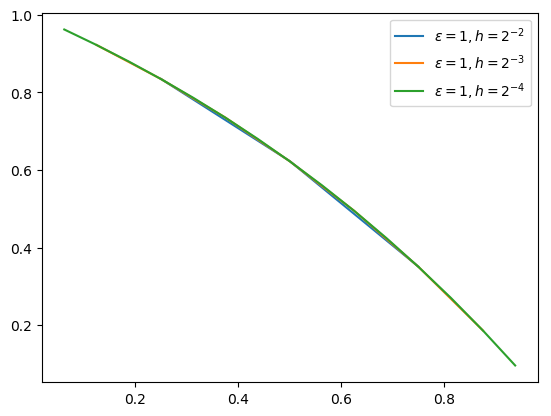

In [4]:
using PyPlot
    plot(ts1a,ys1a,label = L"\epsilon = 1, h = 2^{-2}")
    plot(ts2a,ys2a,label = L"\epsilon = 1, h = 2^{-3}")
    plot(ts3a,ys3a,label = L"\epsilon = 1, h = 2^{-4}")
legend();

Looks like when $\epsilon = 1$, approximations for the solution y of the boundary-value problem are fairly accurate.

In [5]:
ϵ = .01;
p(t) = ϵ;
q(t) = 1;
r(t) = 0;
f(t) = 0;
a = 0;
b = 1;
α = 1;
β = 0;
h = 2.0^-2
ts1b,ys1b = finite_central_difference_2_electric_boogaloo(p,q,r,f,a,b,α,β,h)
h = 2.0^-3
ts2b,ys2b = finite_central_difference_2_electric_boogaloo(p,q,r,f,a,b,α,β,h)
h = 2.0^-4
ts3b,ys3b = finite_central_difference_2_electric_boogaloo(p,q,r,f,a,b,α,β,h)
h = 2.0^-6
ts4b,ys4b = finite_central_difference_2_electric_boogaloo(p,q,r,f,a,b,α,β,h)

(0.015625:0.015625:0.984375, [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 0.999997, 0.999972, 0.999773, 0.998148, 0.984918, 0.877193])

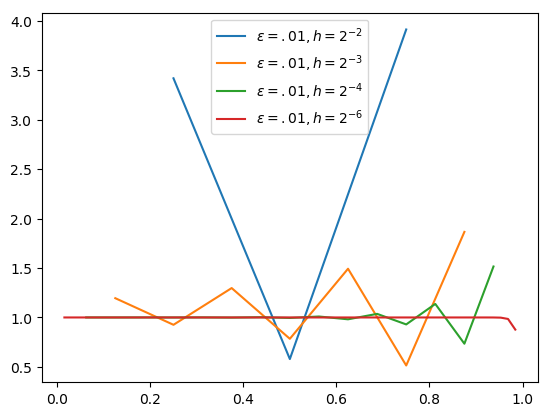

In [6]:
using PyPlot
    plot(ts1b,ys1b,label = L"\epsilon = .01, h = 2^{-2}")
    plot(ts2b,ys2b,label = L"\epsilon = .01, h = 2^{-3}")
    plot(ts3b,ys3b,label = L"\epsilon = .01, h = 2^{-4}")
    plot(ts4b,ys4b,label = L"\epsilon = .01, h = 2^{-6}")
legend();

When $\epsilon$ is small ($\approx 0.01$), however, we see the stability problem occurring until we make h sufficiently small ($h = \frac{1}{64} < 2\epsilon$ works).